# Acoustic TimeStepping SC Experiments

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
import sys
sys.path.append('../..')
from python.mluqmppy import *
from matplotlib import gridspec

mpp = mppy.Mpp(
    project_name='MLUQ',
    executable='M++',
    build_dir='mpp/build-acoustic-ts-sc',
    cmake_args='-DBUILD_UQ=On', '-DBUILD_UQ_TESTS=Off',
    mute=False,
    kernels=4
)

mpp.build()


================ running cmake ================

-- Option:     SPACE_DIM= 2   (using cached value)
-- Option:     USE_FFTW= ON   (using cached value)
-- Option:     USE_SPACETIME= OFF   (using cached value)
-- Option:     USE_SPLITTED_COMMS= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     BUILD_TUTORIAL= ON   (using cached value)
-- Option:     BUILD_MLUQ_TESTS= Off   (using cached value)
-- Sub option: BUILD_TUTORIAL_TESTS= ON   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppDebug   (using cached value)
-- Found OpenMP_C: -fopenmp  
-- Found OpenMP_CXX: -fopenmp  
-- Found OpenMP: TRUE   
-- A library with LAPACK API found.
-- Checking for LAPACK LQ factorization: found
-- 
-- Tasmanian 7.6 (development): summary of build options
--  -D CMAKE_BUILD_TYPE:STRING=Debug
--  -D CMAKE_INSTALL_PREFIX:PATH=/usr/local
--  -D CMAKE_CXX_FLAGS:STRING=
--  -D BUILD_SHARED_LIBS=ON

0

In [9]:
import socket

print(socket.gethostname())

if socket.gethostname().find("niklas") != -1:
    test_stochastic_level = 1
    stochLevels = range(2)
    levels = range(2)
    mpp.kernels = 4
    test_level = 1
    
elif socket.gethostname().find("runner") != -1:
    test_stochastic_level = 1 
    stochLevels = range(3)
    levels = range(3)
    mpp.kernels = 16
    test_level = 1

else:
    test_stochastic_level = 2
    stochLevels = range(8)
    levels = range(8)
    mpp.kernels = {8: 64}
    test_level = 3
    
test_time_steps = list(map(int, np.linspace(0, 8, 1 + 2**test_level)))
test_time_steps[0] = 2

niklas-ThinkPad-T470p


In [10]:
mpp.reset_data()
mpp.run(config="sc_acoustic", kwargs={"VtuPlot": 1, "Level": test_level, "stochLevel": test_stochastic_level})
data = mpp.parse_log()


================ running  mpp ================

start program on 4 procs at Thu May 26 11:38:43 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     TimeIntegratorVerbose: ................... 1
     VtuPlot: ................................. 1
     ConfigVerbose: ........................... 1
     AssembleVerbose: ......................... 8
     degree: .................................. 2
     Model: ................................... DGAcoustic
     Level: ................................... 1
     Quantity: ................................ L1
     Overlap: ................................. dG1
     MeshVerbose: ............................. 0
     Estimator: ............................... SC
     Distribution: ............................ RCB
     TimeSteppingVerbose: ..................... 0
     Problem: ................................. SGInitialValueCRC
     epsilon: ................................. 0.0
     OnlyFine: ................................ false
     PDESol

KeyboardInterrupt: 

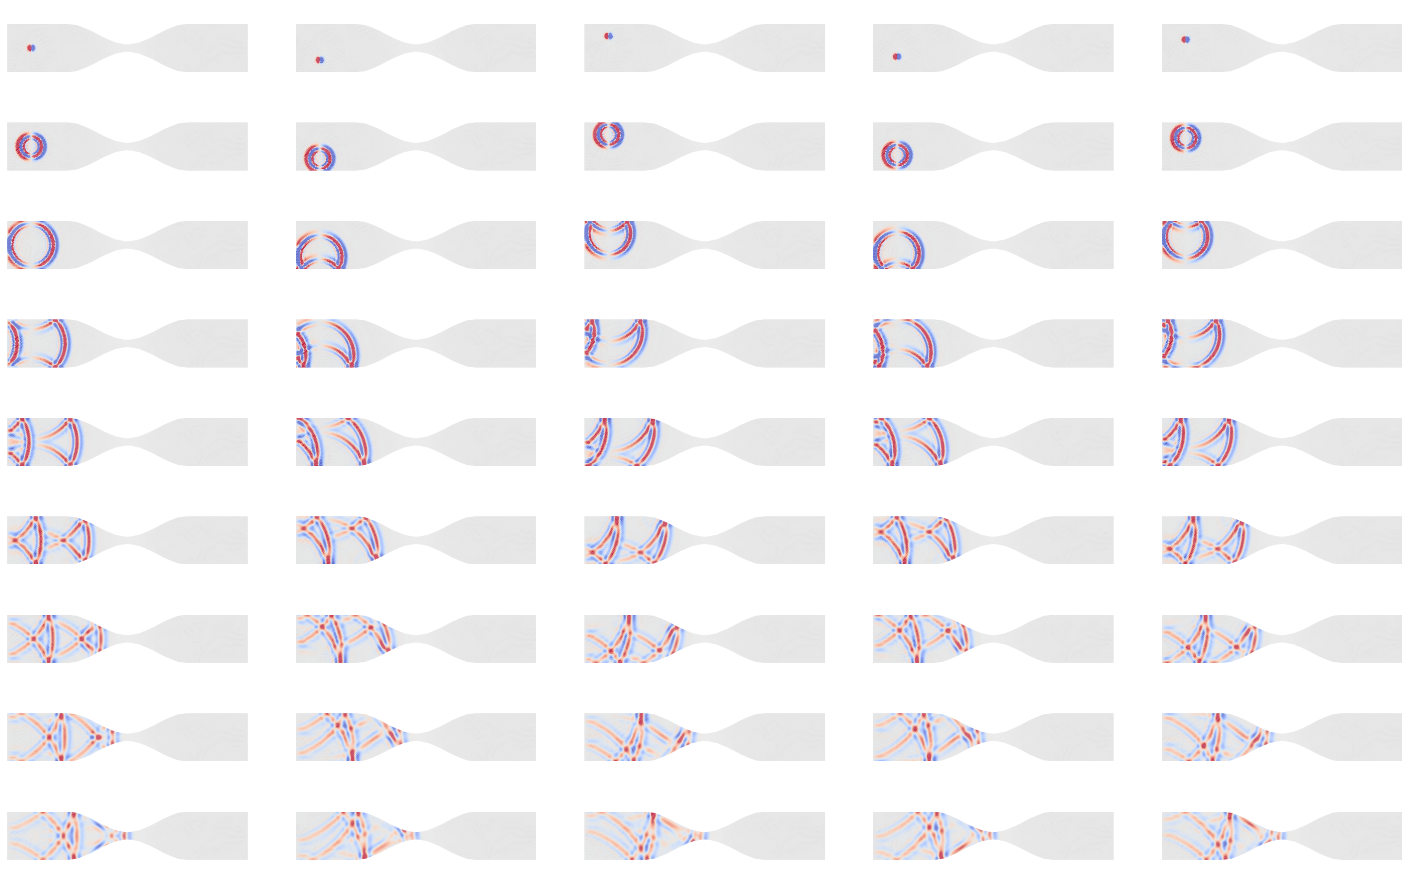

In [6]:
p = mpp.vtu_plot(figsize=(25, 16))
gs = gridspec.GridSpec(9, 5)

for index, ts in enumerate([1, 16, 32, 48, 64, 80, 96, 112, 128]):
    for sample in range(5):
        p.ax = p.fig.add_subplot(gs[sample + index * 5])
        p.add_vtu("U.{}.0.{}.{}.vtu".format(test_level, sample, ts), vmin = -0.1, vmax = 0.1, ax=p.ax, cb=False)
        p.ax.axis('off')
        
plt.savefig(abspath(join(mpp.dm.PROJECT_PY_DATA_DIR, 'SGInitialValueCRC.png')))

In [8]:
kwargs = {}
for stochLevel in stochLevels:
    for level in levels:
        kwargs["stochLevel"] = stochLevel
        kwargs["Level"] = level     
        mpp.run(config="sc_acoustic", kwargs=kwargs)
        mpp.parse_log()

value_error_over_level_plot(mpp, label="stochLevel")


================ running  mpp ================

start program on 64 procs at Tue Feb  8 17:57:29 2022
Running on: ma-pde08
    Config Info:
      TimeIntegratorVerbose: ................... 1
      PDESolverVerbose: ........................ 2
      PDESolverPlotting: ....................... 0
      Distribution: ............................ RCB
      Overlap: ................................. dG1
      degree: .................................. 2
      AssembleVerbose: ......................... 8
      Problem: ................................. SGInitialValueCRC
      TimeSteppingVerbose: ..................... 0
      Model: ................................... DGAcoustic
      Quantity: ................................ L1
      MeshVerbose: ............................. 0
      Estimator: ............................... SC
      epsilon: ................................. 0.0
      Level: ................................... 0
      stochLevel: .............................. 0
      Only

start program on 64 procs at Tue Feb  8 17:57:37 2022
Running on: ma-pde08
    Config Info:
      TimeIntegratorVerbose: ................... 1
      PDESolverVerbose: ........................ 2
      PDESolverPlotting: ....................... 0
      Distribution: ............................ RCB
      Overlap: ................................. dG1
      degree: .................................. 2
      AssembleVerbose: ......................... 8
      Problem: ................................. SGInitialValueCRC
      TimeSteppingVerbose: ..................... 0
      Model: ................................... DGAcoustic
      Quantity: ................................ L1
      MeshVerbose: ............................. 0
      Estimator: ............................... SC
      epsilon: ................................. 0.0
      Level: ................................... 1
      stochLevel: .............................. 0
      OnlyFine: ................................ false
    

start program on 64 procs at Tue Feb  8 17:57:48 2022
Running on: ma-pde08
    Config Info:
      TimeIntegratorVerbose: ................... 1
      PDESolverVerbose: ........................ 2
      PDESolverPlotting: ....................... 0
      Distribution: ............................ RCB
      Overlap: ................................. dG1
      degree: .................................. 2
      AssembleVerbose: ......................... 8
      Problem: ................................. SGInitialValueCRC
      TimeSteppingVerbose: ..................... 0
      Model: ................................... DGAcoustic
      Quantity: ................................ L1
      MeshVerbose: ............................. 0
      Estimator: ............................... SC
      epsilon: ................................. 0.0
      Level: ................................... 2
      stochLevel: .............................. 0
      OnlyFine: ................................ false
    

start program on 64 procs at Tue Feb  8 17:58:10 2022
Running on: ma-pde08
    Config Info:
      TimeIntegratorVerbose: ................... 1
      PDESolverVerbose: ........................ 2
      PDESolverPlotting: ....................... 0
      Distribution: ............................ RCB
      Overlap: ................................. dG1
      degree: .................................. 2
      AssembleVerbose: ......................... 8
      Problem: ................................. SGInitialValueCRC
      TimeSteppingVerbose: ..................... 0
      Model: ................................... DGAcoustic
      Quantity: ................................ L1
      MeshVerbose: ............................. 0
      Estimator: ............................... SC
      epsilon: ................................. 0.0
      Level: ................................... 3
      stochLevel: .............................. 0
      OnlyFine: ................................ false
    

        TI: n=120   t=7.5           Energy=0.0059319177  MaxP=0.0050899656  MinP=-0.014617046  L1=0.089615881   L2=0.01049709    
        TI: n=128   t=8             Energy=0.0057333732  MaxP=0             MinP=-0.0094313915 L1=0.074723431   L2=0.0070365709  
        TI: 11.32 seconds
      SSC3: U.3.1.0 Q=0.074723431 C=11.316674 W=4
      SSC3: Start Tue Feb  8 18:00:12 2022 U.3.0.1 Q=0.067101098 C=109.64934 W=4
terminate called after throwing an instance of 'std::bad_alloc'
  what():  std::bad_alloc
[ma-pde08:87112] *** Process received signal ***
terminate called after throwing an instance of 'std::bad_alloc'
  what():  std::bad_alloc
[ma-pde08:87160] *** Process received signal ***
terminate called after throwing an instance of 'std::bad_alloc'
  what():  std::bad_alloc
[ma-pde08:87184] *** Process received signal ***
[ma-pde08:87184] Signal: Aborted (6)
[ma-pde08:87184] Signal code:  (-6)
terminate called after throwing an instance of 'std::bad_alloc'
  what():  std::bad_alloc
[ma

start program on 64 procs at Tue Feb  8 18:00:13 2022
Running on: ma-pde08
    Config Info:
      TimeIntegratorVerbose: ................... 1
      PDESolverVerbose: ........................ 2
      PDESolverPlotting: ....................... 0
      Distribution: ............................ RCB
      Overlap: ................................. dG1
      degree: .................................. 2
      AssembleVerbose: ......................... 8
      Problem: ................................. SGInitialValueCRC
      TimeSteppingVerbose: ..................... 0
      Model: ................................... DGAcoustic
      Quantity: ................................ L1
      MeshVerbose: ............................. 0
      Estimator: ............................... SC
      epsilon: ................................. 0.0
      Level: ................................... 4
      stochLevel: .............................. 0
      OnlyFine: ................................ false
    

        TI: n=400   t=6.25          Energy=0.070942627   MaxP=0.35553106    MinP=-0.37728534   L1=0.27230766    L2=0.10670062    
        TI: n=408   t=6.375         Energy=0.069927562   MaxP=0.22344161    MinP=-0.28696288   L1=0.27991938    L2=0.10675682    
        TI: n=416   t=6.5           Energy=0.068942532   MaxP=0.22715185    MinP=-0.33594825   L1=0.27478671    L2=0.10235313    
        TI: n=424   t=6.625         Energy=0.067986229   MaxP=0.20565421    MinP=-0.27820089   L1=0.26429341    L2=0.09557595    
        TI: n=432   t=6.75          Energy=0.067057381   MaxP=0.18065553    MinP=-0.23414896   L1=0.24703407    L2=0.086421385   
        TI: n=440   t=6.875         Energy=0.066154758   MaxP=0.16334481    MinP=-0.22936272   L1=0.23659019    L2=0.077515555   
        TI: n=448   t=7             Energy=0.06527721    MaxP=0.1813462     MinP=-0.16491828   L1=0.20711514    L2=0.058958247   
        TI: n=456   t=7.125         Energy=0.064423672   MaxP=0.11637566    MinP=-0.111410

start program on 64 procs at Tue Feb  8 18:17:07 2022
Running on: ma-pde08
    Config Info:
      TimeIntegratorVerbose: ................... 1
      PDESolverVerbose: ........................ 2
      PDESolverPlotting: ....................... 0
      Distribution: ............................ RCB
      Overlap: ................................. dG1
      degree: .................................. 2
      AssembleVerbose: ......................... 8
      Problem: ................................. SGInitialValueCRC
      TimeSteppingVerbose: ..................... 0
      Model: ................................... DGAcoustic
      Quantity: ................................ L1
      MeshVerbose: ............................. 0
      Estimator: ............................... SC
      epsilon: ................................. 0.0
      Level: ................................... 5
      stochLevel: .............................. 0
      OnlyFine: ................................ false
    

KeyboardInterrupt: 